In [ ]:
# Load dataset
papers = pd.read_csv("/content/2_eligible_publications.csv", sep=",", encoding='latin-1')
papers

,Journal,Title,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,1C,Algae,"Guedes, ElÃÂ­ca Amara CecÃÂ­lia; de Carvalho...",2014,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂ³rio de Produtos Naturais, Institu..."
1,Marine Drugs,Biological Activities and Chemical Composition...,1A,Algae,"Pereira, Hugo; CustÃ³dio, LuÃ­sa; Rodrigues, M...",2015,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg..."
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃ³es, U..."
3,Marine Drugs,Potential Utilization of a Polysaccharide from...,1D,Algae,"da Silva, Ana ClÃÂ¡udia Rodrigues; Duarte, Ma...",2018,"Worldwide, snakebites have serious implication...",['Journal Article'],['Department of Molecular and Cellular Biology...
4,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂ¡nica A...
...,...,...,...,...,...,...,...,...,...
672,BioMed Research International,The Protective Action of Coutarea hexandra (Ru...,1D,Plant extract,"Pilon, Grazielle D.; Farias-de-FranÃ§a, Anna P...",2024,Envenomations by snakes represent a neglected ...,['Journal Article'],"['Biomedicine Course, University of Sorocaba (..."
673,Scientific Reports,The synergistic effect of Ficus carica nanopar...,1A,Plant extract,"El-Attar, Naira A.; El-Sawi, Mamdouh R.; El-Sh...",2024,Bilharzia is a parasitic flatworm that causes ...,['Journal Article'],['https://ror.org/01k8vtd75grid.10251.370000 0...
674,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...
675,Pharmaceutics,Topical Nanoemulsions as Delivery Systems for ...,1E,Plant extract,"Medeiros-Neves, Bruna; Heidrich, Daiane; Schuh...",2024,Coumarins are benzopyrones found in several pl...,['Journal Article'],['Programa de PÃ³s-GraduaÃ§Ã£o em CiÃªncias Fa...


In [ ]:
# Define function for classification
def classify_labels(text):
    labels = []
    patterns = {
        "Africa": [r"(?i)\b{}\b".format(country) for country in [
            "Algeria", "Algerie", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde",
            "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea",
            "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
            "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali",
            "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
            "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa",
            "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe", "Cote d'ivoire"
        ]],
        "Asia": [r"(?i)\b{}\b".format(country) for country in [
            "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia",
            "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan",
            "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia",
            "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar",
            "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Tajikistan", "Thailand",
            "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
        ]],
        "Europe": [r"(?i)\b{}\b".format(country) for country in [
            "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia",
            "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
            "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta",
            "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal",
            "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
            "Ukraine", "United Kingdom", "UK"
        ]],
        "North America": [r"(?i)\b{}\b".format(country) for country in [
            "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica",
            "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico",
            "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
            "Trinidad and Tobago", "United States", "USA", "US", "México"
        ]],
        "South America": [r"(?i)\b{}\b".format(country) for country in [
            "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru",
            "Suriname", "Uruguay", "Venezuela", "Brasil", ""
        ]],
        "Oceania": [r"(?i)\b{}\b".format(country) for country in [
            "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau",
            "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"
        ]]
    }

    for label, regex_list in patterns.items():
        if any(re.search(pattern, text) for pattern in regex_list):
            labels.append(label)

    return labels

# Apply classification
if "Affiliations" in papers.columns:
    papers["Labels"] = papers["Affiliations"].fillna("").apply(classify_labels)
else:
    raise ValueError("Error: The 'Affiliations' column does not exist in the DataFrame.")

In [ ]:
# Load the dataset with classifications
papers = pd.read_csv("/content/5_updated_affiliations_with_labels.csv", sep=",", encoding='latin-1')
papers

,Journal,Title,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations,Labels
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,1C,Algae,"Guedes, ElÃÂÃÂ­ca Amara CecÃÂÃÂ­lia; de ...",2014,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂÃÂ³rio de Produtos Naturais, Ins...","['North America', 'South America']"
1,Marine Drugs,Biological Activities and Chemical Composition...,1A,Algae,"Pereira, Hugo; CustÃÂ³dio, LuÃÂ­sa; Rodrigue...",2015,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg...","['Asia', 'Europe', 'North America']"
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃÂ³es,...","['North America', 'South America']"
3,Marine Drugs,Potential Utilization of a Polysaccharide from...,1D,Algae,"da Silva, Ana ClÃÂÃÂ¡udia Rodrigues; Duarte...",2018,"Worldwide, snakebites have serious implication...",['Journal Article'],['Department of Molecular and Cellular Biology...,['South America']
4,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂÃÂ¡ni...,"['Africa', 'Europe']"
...,...,...,...,...,...,...,...,...,...,...
672,BioMed Research International,The Protective Action of Coutarea hexandra (Ru...,1D,Plant extract,"Pilon, Grazielle D.; Farias-de-FranÃÂ§a, Anna...",2024,Envenomations by snakes represent a neglected ...,['Journal Article'],"['Biomedicine Course, University of Sorocaba (...",['South America']
673,Scientific Reports,The synergistic effect of Ficus carica nanopar...,1A,Plant extract,"El-Attar, Naira A.; El-Sawi, Mamdouh R.; El-Sh...",2024,Bilharzia is a parasitic flatworm that causes ...,['Journal Article'],['https://ror.org/01k8vtd75grid.10251.370000 0...,['Africa']
674,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...,['Asia']
675,Pharmaceutics,Topical Nanoemulsions as Delivery Systems for ...,1E,Plant extract,"Medeiros-Neves, Bruna; Heidrich, Daiane; Schuh...",2024,Coumarins are benzopyrones found in several pl...,['Journal Article'],['Programa de PÃÂ³s-GraduaÃÂ§ÃÂ£o em CiÃÂª...,"['Asia', 'South America']"


In [ ]:
# Convert Labels back to list
papers["Labels"] = papers["Labels"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Check if Year column exists
if "Year" not in papers.columns:
    raise ValueError("Error: The 'Year' column does not exist in the DataFrame.")

# Filter years
papers = papers[(papers["Year"] >= 2000) & (papers["Year"] <= 2025)]


for year in years:
    year_data = papers[papers["Year"] == year]
    label_counts = Counter(label for labels in year_data["Labels"] for label in labels)
    for continent in continent_year_counts.keys():
        continent_year_counts[continent].append(label_counts.get(continent, 0))

# Create DataFrame for visualization
plot_data = pd.DataFrame({
    "Year": list(years) * len(continent_year_counts),
    "Publications": [count for counts in continent_year_counts.values() for count in counts],
    "Continent": [continent for continent, counts in continent_year_counts.items() for _ in counts]
})

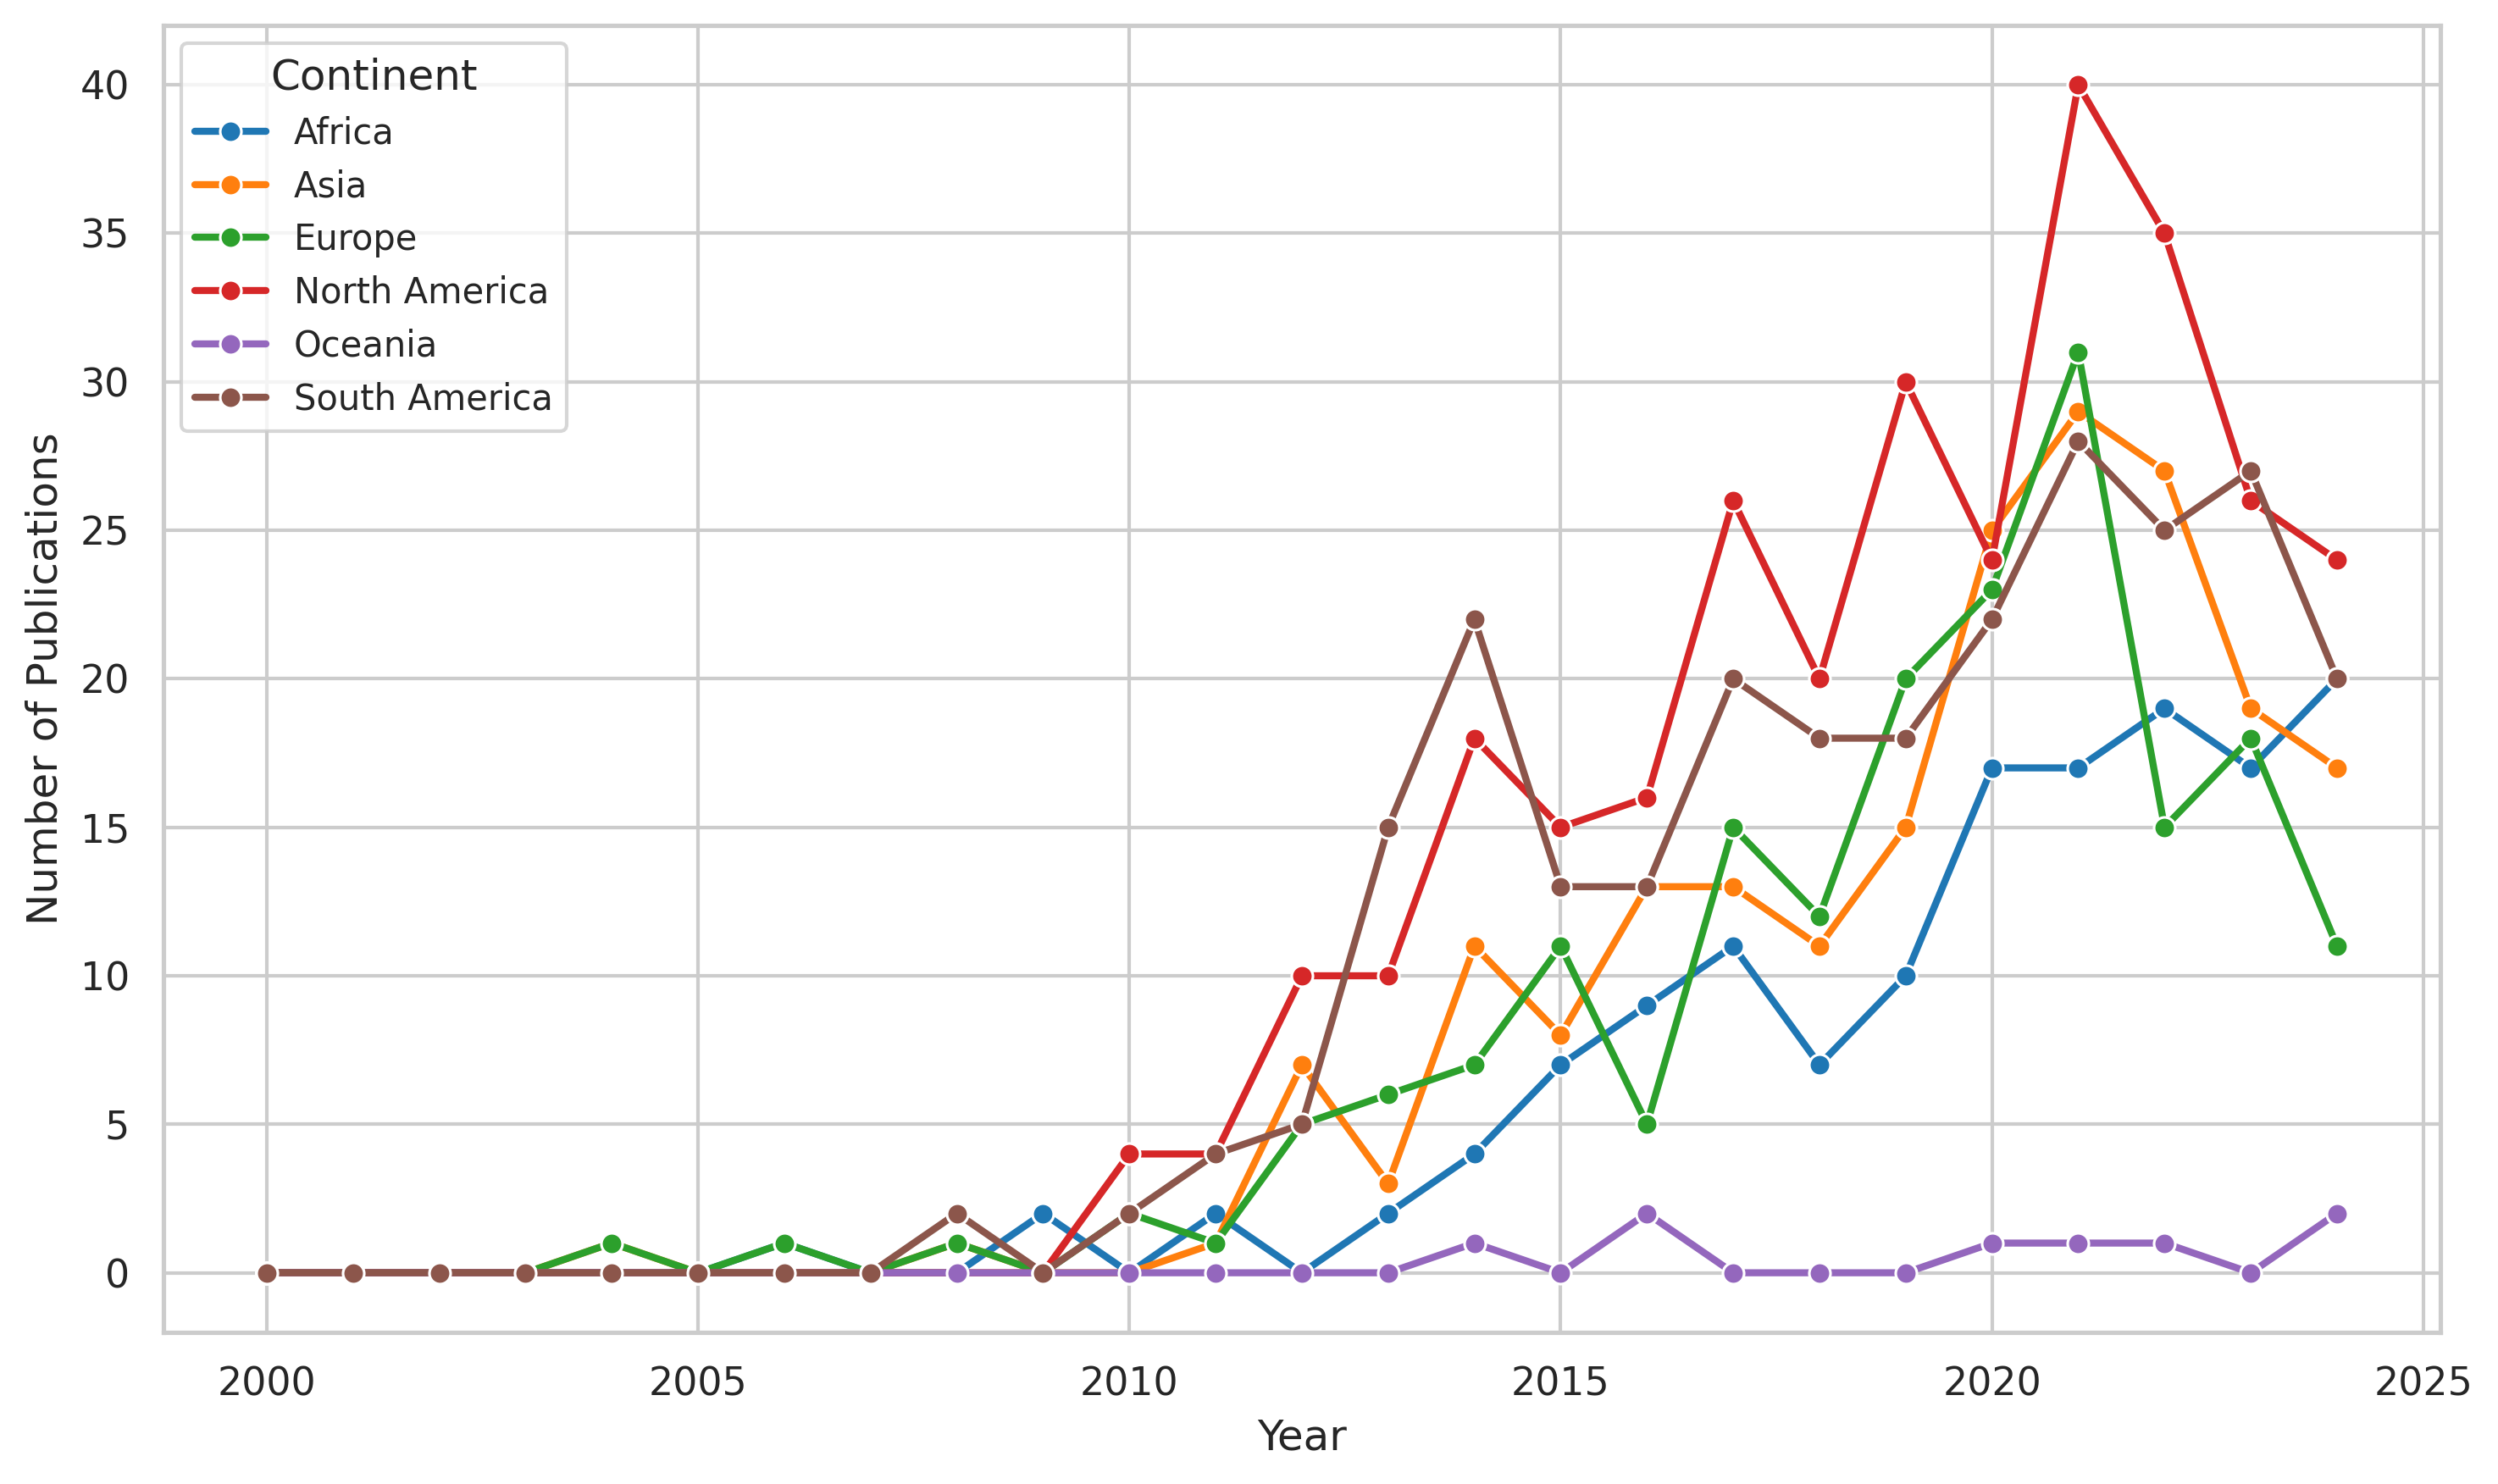

In [ ]:
# Plot using Seaborn
sns.set(style="whitegrid", palette="tab10")
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=plot_data,
    x="Year",
    y="Publications",
    hue="Continent",
    marker="o",
    linewidth=2
)

# Customize plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
#plt.title("Publication Trends by Continent (2000–2025)")
plt.legend(title="Continent", fontsize=10)
plt.tight_layout()
plt.show()

COUNTRIES

In [ ]:
# Define a function to extract country from the first author's affiliation
countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad",
    "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic",
    "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France",
    "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau",
    "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel",
    "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos",
    "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar",
    "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico",
    "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia",
    "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland",
    "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone",
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan",
    "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania",
    "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu",
    "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu",
    "Vatican City", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]


def extract_country(affiliation):
    """Extracts country from affiliation string."""
    if pd.isna(affiliation) or not isinstance(affiliation, str):
        return "Other"

    first_affiliation = affiliation.split(';')[0]  # Extract the first affiliation if multiple
    for country, pattern in country_patterns.items():
        if pattern.search(first_affiliation):
            return country
    return "Other"

# Apply the function to extract countries
data["Country"] = data["Affiliations"].apply(extract_country)


In [ ]:
data = pd.read_csv("/content/6_updated_with_country_column.csv", sep=",", encoding='latin-1')
data

,Journal,Title,Tag1,Tag2,Authors,Year,Abstract,Paper_type,Affiliations,Country
0,Journal of Parasitology Research,Larvicidal Activity against Aedes aegypti and ...,1C,Algae,"Guedes, ElÃÂÃÂ­ca Amara CecÃÂÃÂ­lia; de ...",2014,This study investigated the biological activit...,['Journal Article'],"['LaboratÃÂÃÂ³rio de Produtos Naturais, Ins...",Brazil
1,Marine Drugs,Biological Activities and Chemical Composition...,1A,Algae,"Pereira, Hugo; CustÃÂ³dio, LuÃÂ­sa; Rodrigue...",2015,Four lipid-rich microalgal species from the Re...,['Journal Article'],"['Centre of Marine Sciences, University of Alg...",Portugal
2,Marine Drugs,The Brown Alga Stypopodium zonale (Dictyotacea...,1A,Algae,"Soares, Deivid Costa; Szlachta, Marcella Maced...",2016,This study evaluated the anti-Leishmania amazo...,['Journal Article'],"['Instituto de Microbiologia Paulo de GÃÂ³es,...",Brazil
3,Marine Drugs,Potential Utilization of a Polysaccharide from...,1D,Algae,"da Silva, Ana ClÃÂÃÂ¡udia Rodrigues; Duarte...",2018,"Worldwide, snakebites have serious implication...",['Journal Article'],['Department of Molecular and Cellular Biology...,Brazil
4,Marine Drugs,"Spiralyde A, an Antikinetoplastid Dolabellane ...",1A,Algae,"Chiboub, Olfa; Sifaoui, Ines; Lorenzo-Morales,...",2019,Bioassay-guided fractionation of the antikinet...,['Journal Article'],['Instituto Universitario de Bio-OrgÃÂÃÂ¡ni...,Spain
...,...,...,...,...,...,...,...,...,...,...
672,BioMed Research International,The Protective Action of Coutarea hexandra (Ru...,1D,Plant extract,"Pilon, Grazielle D.; Farias-de-FranÃÂ§a, Anna...",2024,Envenomations by snakes represent a neglected ...,['Journal Article'],"['Biomedicine Course, University of Sorocaba (...",Brazil
673,Scientific Reports,The synergistic effect of Ficus carica nanopar...,1A,Plant extract,"El-Attar, Naira A.; El-Sawi, Mamdouh R.; El-Sh...",2024,Bilharzia is a parasitic flatworm that causes ...,['Journal Article'],['https://ror.org/01k8vtd75grid.10251.370000 0...,Egypt
674,BMC Complementary Medicine and Therapies,Therapeutic potential of Indonesian plant extr...,1A,Plant extract,"Sari, Defi Kartika; Jeelani, Ghulam; Ilmi, Hil...",2024,Background: Neglected tropical diseases (NTDs)...,['Journal Article'],['https://ror.org/04ctejd88grid.440745.60000 0...,Indonesia
675,Pharmaceutics,Topical Nanoemulsions as Delivery Systems for ...,1E,Plant extract,"Medeiros-Neves, Bruna; Heidrich, Daiane; Schuh...",2024,Coumarins are benzopyrones found in several pl...,['Journal Article'],['Programa de PÃÂ³s-GraduaÃÂ§ÃÂ£o em CiÃÂª...,Brazil


In [ ]:
# Filter data for the years 2000–2025
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2025)]

# Group by year and country to count publications
grouped = data.groupby(["Year", "Country"]).size().reset_index(name="Count")

# Identify top 6 countries by total contributions
top_countries = grouped.groupby("Country")["Count"].sum().nlargest(6).index.tolist()
top_countries

['Brazil', 'India', 'Germany', 'Iran', 'Egypt', 'USA']

In [ ]:
# Filter data for the top countries
filtered = grouped[grouped["Country"].isin(top_countries)]

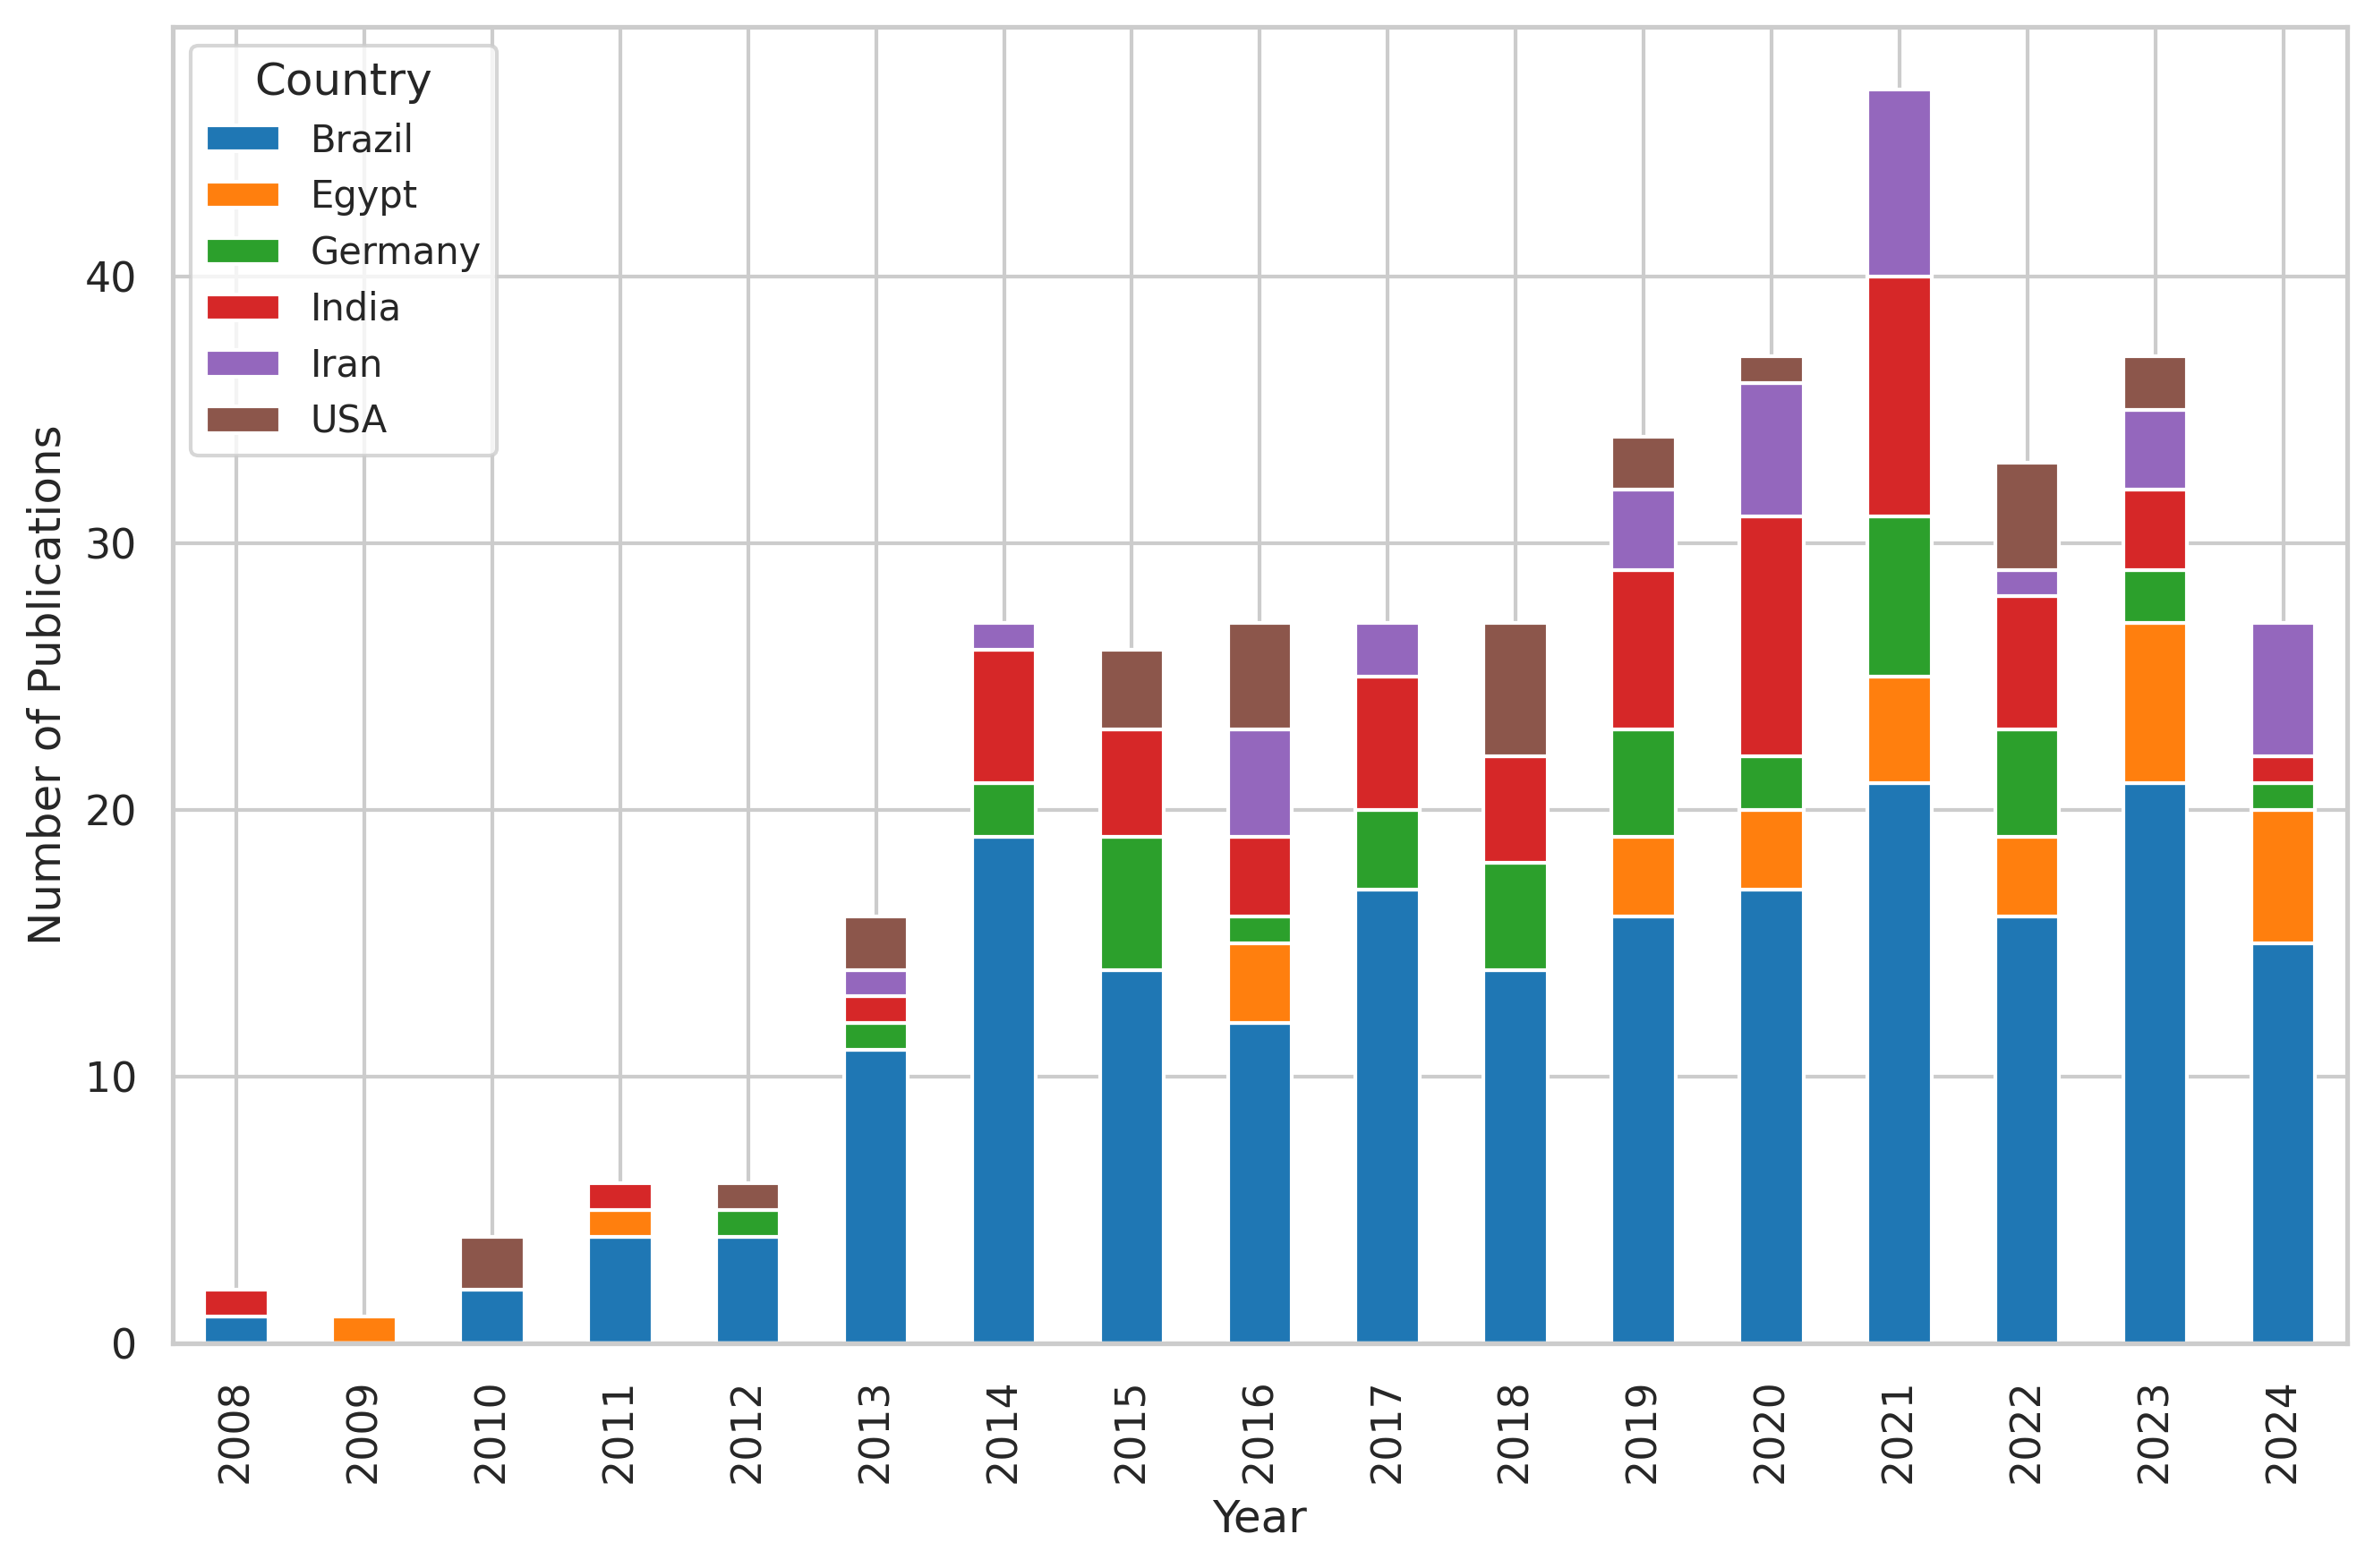

In [ ]:
data = pd.read_csv("/content/6_updated_with_country_column.csv", sep=",", encoding='latin-1')

# Filter data for the years 2000–2025
data = data[(data["Year"] >= 2000) & (data["Year"] <= 2025)]

# Group by year and country to count publications
grouped = data.groupby(["Year", "Country"]).size().reset_index(name="Count")

# Identify top 6 countries by total contributions
top_countries = grouped.groupby("Country")["Count"].sum().nlargest(6).index.tolist()

# Filter data for the top countries
filtered = grouped[grouped["Country"].isin(top_countries)]

# Create the stacked bar plot
plt.figure(figsize=(9, 6))
filtered.pivot(index='Year', columns='Country', values='Count').plot(kind='bar', stacked=True, ax=plt.gca())

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Publications", fontsize=12)
plt.legend(title="Country", fontsize=10)
plt.tight_layout()
plt.show()
